<a href="https://colab.research.google.com/github/pedsanches/C-digos_GA/blob/main/GA_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import matplotlib.cm as cm
from numpy import loadtxt
import re
import pandas as pd

In [ ]:
ref_arquivo = pd.read_csv('https://raw.githubusercontent.com/pedsanches/IA/main/entrada.txt',sep="\n",header=None)

In [ ]:
print(ref_arquivo[0])


0            5000
1              35
2      (1170,450)
3       (340,120)
4      (460,1000)
5       (900,840)
6       (540,970)
7       (800,230)
8       (810,550)
9       (230,880)
10      (960,370)
11      (390,180)
12      (500,140)
13     (670,1300)
14      (290,630)
15    (1280,1140)
16    (1010,1260)
17      (480,690)
18       (90,990)
19     (480,1110)
20      (750,610)
21     (850,1020)
22    (1150,1380)
23     (1310,750)
24     (640,1200)
25     (460,1240)
26      (380,300)
27     (930,1330)
28     (1040,580)
29      (610,880)
30     (1130,350)
31       (80,660)
32      (470,720)
33      (800,910)
34     (370,1240)
35      (120,210)
36     (1120,370)
Name: 0, dtype: object


In [ ]:
!cat /etc/os-release


NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


#Lê Arquivo


In [ ]:
def le_arquivo():
  #ref_arquivo = open("/entrada.txt","r")
  i=0
  conteudo_transformado = []
  for linha in ref_arquivo[0]:
    if(linha == 0 ):
      continue
    conteudo = linha.split()
    conteudo = (re.sub("\(|\)","",conteudo[0])).split(",")
    if(i>=2):
      #print(int(conteudo[0]),int(conteudo[1]))
      conteudo_transformado.append([int(conteudo[0]),int(conteudo[1]),float(int(conteudo[1])/int(conteudo[0])),i-2])
    else:
      #print(int(conteudo[0]))
      conteudo_transformado.append(int(conteudo[0]))
    i+=1
  return (conteudo_transformado.copy())

In [ ]:
custo_beneficio = le_arquivo()
print(custo_beneficio)
del(custo_beneficio[0:2])
custo_beneficio.sort(key=lambda x:x[2],reverse=False)
print(custo_beneficio)


[5000, 35, [1170, 450, 0.38461538461538464, 0], [340, 120, 0.35294117647058826, 1], [460, 1000, 2.1739130434782608, 2], [900, 840, 0.9333333333333333, 3], [540, 970, 1.7962962962962963, 4], [800, 230, 0.2875, 5], [810, 550, 0.6790123456790124, 6], [230, 880, 3.8260869565217392, 7], [960, 370, 0.3854166666666667, 8], [390, 180, 0.46153846153846156, 9], [500, 140, 0.28, 10], [670, 1300, 1.9402985074626866, 11], [290, 630, 2.1724137931034484, 12], [1280, 1140, 0.890625, 13], [1010, 1260, 1.2475247524752475, 14], [480, 690, 1.4375, 15], [90, 990, 11.0, 16], [480, 1110, 2.3125, 17], [750, 610, 0.8133333333333334, 18], [850, 1020, 1.2, 19], [1150, 1380, 1.2, 20], [1310, 750, 0.5725190839694656, 21], [640, 1200, 1.875, 22], [460, 1240, 2.6956521739130435, 23], [380, 300, 0.7894736842105263, 24], [930, 1330, 1.4301075268817205, 25], [1040, 580, 0.5576923076923077, 26], [610, 880, 1.4426229508196722, 27], [1130, 350, 0.30973451327433627, 28], [80, 660, 8.25, 29], [470, 720, 1.5319148936170213, 

#Normalizador

In [ ]:
def norm():
  peso_tot = 0
  valor_tot = 0 
  for i in infos_normalizado:
    if(type(i) == int):
      continue
    peso_tot += i[0]
    valor_tot += i[1]

  for i in infos_normalizado:
    if(type(i) == int):
      continue
    i[0] = float( i[0]/peso_tot )
    i[1] = float( i[1]/peso_tot )
  
infos_normalizado =  le_arquivo()
norm()
print(infos_normalizado)

[5000, 35, [0.04955527318932656, 0.01905972045743329, 0.38461538461538464, 0], [0.014400677678949597, 0.005082592121982211, 0.35294117647058826, 1], [0.019483269800931808, 0.042354934349851756, 2.1739130434782608, 2], [0.03811944091486658, 0.035578144853875476, 0.9333333333333333, 3], [0.022871664548919948, 0.041084286319356206, 1.7962962962962963, 4], [0.0338839474798814, 0.009741634900465904, 0.2875, 5], [0.03430749682337993, 0.023295213892418468, 0.6790123456790124, 6], [0.009741634900465904, 0.03727234222786955, 3.8260869565217392, 7], [0.04066073697585769, 0.015671325709445152, 0.3854166666666667, 8], [0.016518424396442185, 0.007623888182973317, 0.46153846153846156, 9], [0.021177467174925878, 0.005929690808979246, 0.28, 10], [0.028377806014400677, 0.05506141465480729, 1.9402985074626866, 11], [0.01228293096145701, 0.026683608640406607, 2.1724137931034484, 12], [0.05421431596781025, 0.048284625158831, 0.890625, 13], [0.04277848369335027, 0.053367217280813214, 1.2475247524752475, 14

#Calcula peso

In [ ]:
def calc_peso(indv):
  somapesototal = 0
  for i in range(len(indv)-1):
    if(i >= len(infos)-1 or i> tam_cromossomo-1):
      continue
    somapesototal += indv[i]*infos[i+2][0]
  return somapesototal

#Correção

In [ ]:
def correcao(indv):
  for i in custo_beneficio:
    if(calc_peso(indv) <= 5000):
       break
    #print(len(indv))
    indv[i[3]] = 0
  return indv.copy()

#Penalidade Proporcional

In [ ]:
def penalidade_proporcional(indv):
  indv[tam_cromossomo] = 0
  indv[tam_cromossomo] += infos[0] - calc_peso(indv)
  return indv.copy()

#Avalia

In [ ]:
def avaliador(aux,versao):
  somapesototal  = calc_peso(aux)
  nota = 0


  #print(somapesototal)
  #if(somapesototal == 0):
    #print(aux)
  if(versao == 2):
    aux = correcao(aux)

  if(calc_peso(aux) <= infos[0]):
    for i in range(tam_cromossomo):
      nota += aux[i]*infos_normalizado[i+2][1]
  else:
    for i in range(tam_cromossomo):
      if(versao == 3):
        nota -= aux[i]*infos_normalizado[i+2][0]
      else:  
        nota = 0
  #if(calc_peso(aux) > infos[0]):
    #nota = infos[0] - calc_peso(aux)
    
  #print(nota)
  
  if(len(aux) > tam_cromossomo):
    aux[tam_cromossomo] = nota
    return aux.copy()
  else:
    aux.append(nota)
    return aux.copy()


#Conta Itens

In [ ]:
def conta_itens(indv):
  num = 0
  for i in indv:
    if(i == 1 ):
      num += 1
  return num

#Torneio

In [ ]:
def torneio(pop):
  num1 = random.randint(0,tam_pop-1)
  num2 = random.randint(0,tam_pop-1)

  if(pop[num1][tam_cromossomo] > pop[num2][tam_cromossomo]):
    return pop[num1].copy()

  elif(pop[num2][tam_cromossomo] > pop[num1][tam_cromossomo]):
    return pop[num2].copy()

  else:
    if(conta_itens(pop[num1]) < conta_itens(pop[num2])):
      return pop[num1].copy()

    else:
      return pop[num2].copy()

#Gera Popução

In [ ]:
def gera_pop():
  cromossomo = []
  for i in range(tam_cromossomo):
    cromossomo.append(random.randint(0, 1))
  return cromossomo.copy()

#Mutação

In [ ]:
def mutacao(aux):
  for i in range(tam_cromossomo):
    if(random.random() <= taxa_mut):
      if(aux[i] == 1): 
        aux[i] = 0
      else:
        aux[i] = 1
  return aux.copy()    

#Crossover

In [ ]:
def crossover(pai1 = [], pai2 = []):
  filho1 = []
  filho2 = []
  filhos = []
  ponto_corte = random.randint(1,tam_cromossomo-2)

  if(random.random()<= taxa_cros):
    for i in range(ponto_corte):
      filho1.append(pai1[i])
      filho2.append(pai2[i])

    #print(len(filho1))

    for i in range(tam_cromossomo-ponto_corte):
      i += ponto_corte
      filho1.append(pai2[i])
      filho2.append(pai1[i])
    filhos.append(filho1.copy())
    filhos.append(filho2.copy())
    
    #print(i)

  else:
    filhos.append(pai1.copy())
    filhos.append(pai2.copy())

  filhos[0] = mutacao(filhos[0]).copy()
  filhos[1] = mutacao(filhos[1]).copy()

  return filhos.copy()

#50% sobreviventes


In [ ]:
def sobrevivencia_taxa(pop=[],filhos=[]):
  for i in range(tam_pop):
    pop.append(filhos[i].copy())
  
  pop.sort(key=lambda x: x[tam_cromossomo], reverse = True)

  pop = pop[:(len(pop)-tam_pop)]
  #print(pop,"\n")
  
  return pop.copy()

#Calc peso total

In [ ]:
def calc_peso_total():
  tot = 0
  for i in infos:
    if(type(i) == int):
      continue
    tot += infos
  
  return tot

#Main

In [ ]:
infos = (le_arquivo()).copy()
tam_cromossomo = infos[1]
peso_max = infos[0]
taxa_cros = 0.7
taxa_mut = 2/tam_cromossomo
tam_pop = 100
qntd_geracoes = 12

def main(versao):
  nota_melhorespais = []
  geracao = 0
  pop = []
  filhos = []
  filhos_cros = []
  melhor_paigeral = []
  melhor_pai=[]
  soma_notas = []
  medias = []
  melhorespaisapenas = []

  for i in range(tam_pop):
    pop.append(gera_pop().copy())

  while(1>0):
    geracao += 1
    soma_notas = 0

    if(geracao == 1):
      melhor_paigeral = pop[i].copy()
      melhor_paigeral.append(-99999)
      melhor_pai = pop[i].copy()
      melhor_paigeral.append(-99999)

    for i in range(tam_pop):
      pop[i] = avaliador(pop[i],versao).copy()
      soma_notas += pop[i][35]
      if(i == 0):
        melhor_pai = pop[i].copy()
        if(melhor_paigeral[tam_cromossomo] < melhor_pai[tam_cromossomo]):
            #print("a")
            melhor_paigeral = melhor_pai.copy()
            melhor_paigeral.append(geracao)
      else:
        #print(melhor_pai[tam_cromossomo],",",pop[i][tam_cromossomo])
        if(melhor_pai[tam_cromossomo] < pop[i][tam_cromossomo]):
          melhor_pai = pop[i].copy()
          if(melhor_paigeral[tam_cromossomo] < melhor_pai[tam_cromossomo]):
            #print("a")
            melhor_paigeral = melhor_pai.copy()
            melhor_paigeral.append(geracao)
    
    #print(melhor_pai[tam_cromossomo])

    #if(len(melhor_paigeral)>36):
      #print(pop)
      #break
    #print(len(pop[0]),pop[0])    

    for i in range(0,tam_pop,2):
      filhos += (crossover(torneio(pop).copy(),torneio(pop).copy()))

    #Sobrevivendo apenas o melhor pai
    #pop = filhos.copy()
    #filhos = []
    #pop[random.randint(0,tam_pop-1)] = melhor_pai.copy()
    
    #Sobrevivendo 50% melhores
    for i in range(tam_pop):
      filhos[i] = avaliador(filhos[i],versao).copy()
    pop = sobrevivencia_taxa(pop.copy(),filhos.copy()).copy()
    filhos = []

    #print(melhor_paigeral[35])
    nota_melhorespais.append(melhor_paigeral[35])
    melhorespaisapenas.append(melhor_paigeral)
    medias.append(soma_notas/tam_pop)
    melhor_pai = []

    if(geracao == qntd_geracoes):
      break

  peso_total=0
  valor_total=0
  #print(peso_total, valor_total)

  #plt.title('Melhores Pais')
  #plt.plot(range(qntd_geracoes), nota_melhorespais)
  #plt.show()

  #plt.title('Medias')
  #plt.plot(range(qntd_geracoes), medias)
  #plt.show()

  #print(melhor_paigeral[tam_cromossomo+1])
  #print(nota_melhorespais)
  return([nota_melhorespais.copy(),melhor_paigeral[tam_cromossomo+1],medias.copy(),melhorespaisapenas.copy()])

#Teste

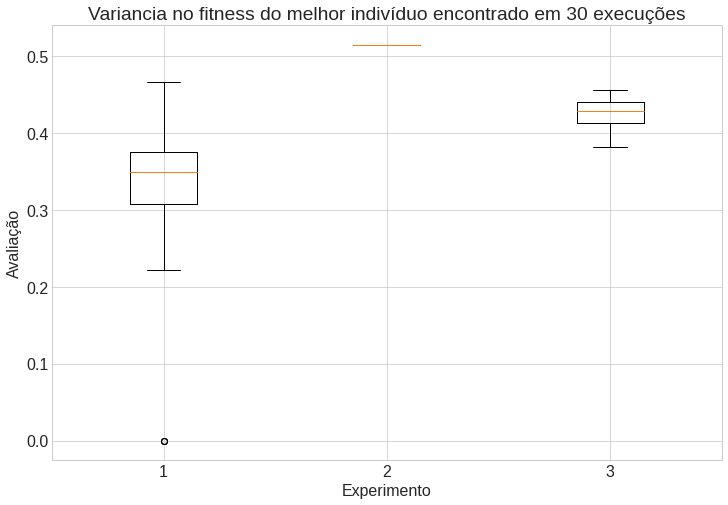

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'ax

In [ ]:
def teste():
  qntd_testes = 30
  valor_total = peso_total = nota_total= 0  
  media = 0
  box = []
  box_t = []
  somatotal_notas = 0
  for j in range(3):
    for i in range(qntd_testes):
      melhor_paigeral = main(j+1).copy()
        #peso_total += melhor_paigeral[i]*infos[i+2][0]
        #valor_total += melhor_paigeral[i]*infos[i+2][1]
      #print(melhor_paigeral[3][melhor_paigeral[1]-1])
      #print("Fitness: ",melhor_paigeral[0][melhor_paigeral[1]-1]," Geração:",melhor_paigeral[1], " Peso:",calc_peso(melhor_paigeral[3][melhor_paigeral[1]-1]) )
    
      #print(len(melhor_paigeral))
      #print(len(melhor_paigeral[2]),len(melhor_paigeral[0]))
      for i in range(len(melhor_paigeral[0])-melhor_paigeral[1]):
        del(melhor_paigeral[0][qntd_geracoes-1-i])
        del(melhor_paigeral[2][qntd_geracoes-1-i])
      box.append(melhor_paigeral[0][melhor_paigeral[1]-1])
      #plt.title('Convergência em uma das execuções')
      #plt.plot(range(melhor_paigeral[1]), melhor_paigeral[0], label = 'Melhores Pais')
      #plt.plot(range(melhor_paigeral[1]), melhor_paigeral[2], label = 'Média')
      #plt.legend()
      #plt.xlabel("Gerações")
      #plt.ylabel("Avaliação")
      #plt.show()
      #plt.boxplot(melhor_paigeral[0])
      #plt.show() 
      #nota_total += melhor_paigeral[35]
    box_t.append(box)
    box = []
  #print("Media Valor final:",valor_total/qntd_testes," Peso final:", peso_total/qntd_testes)
 
  plt.figure(figsize=(12,8))
  plt.boxplot(box_t)
  plt.title('Variancia no fitness do melhor indivíduo encontrado em 30 execuções')
  plt.xlabel("Experimento")
  plt.ylabel("Avaliação")
  plt.rcParams['legend.fontsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16

  
  plt.show()
  print(plt.rcParams.keys())
teste()